<h1>Skill Extraction from documents</h1>
<h2> The code below identifies possible skills in the documents: </h2>

Importing libraries

In [29]:
import glob
import win32com.client
import unicodedata
import string
import nltk
from collections import Counter
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

Reading Sample Resumes

In [2]:
CV_location, i , y ={} , 0 , u""

for files in glob.glob("D:\\Machine Learning\\Resumes\\*.doc*") :
    CV_location[i]=files
    i=i+1
    
for filename in CV_location.values():
    app = win32com.client.Dispatch('Word.Application')
    doc = app.Documents.Open(filename)
    x=doc.Content.Text
    y=y+x
app.Quit()

Removing non-ascii characters and converting unicode to text 

In [19]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

document=unicodedata.normalize('NFKD', y).encode('ascii','ignore')
text=strip_non_ascii(document)

Identifying parts of speech of all words and keeping only the nouns 

In [ ]:
tagged = nltk.pos_tag(nltk.word_tokenize(text))
phrases, phrase = [], ""
for (word, tag) in tagged:
    if tag[:3] == 'NNP':
        if phrase == "": phrase = word
    elif phrase != "":
        phrases.append(phrase.lower())
        phrase = ""

Counting and Sorting the skill in descending order of their appearence

In [ ]:
skills = Counter(phrases)
#sorting dictionary by values
Sorted_skills= sorted(skills.items(), key=lambda x: (-x[1], x[0]))

Removing dictionary words and words which occurred only once in the document

In [37]:
#Check if the word in in dictionary then remove
with open("D:\Machine Learning\English dictionary\English_Dictionary.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)

def is_english_word(word):
    return word.lower() in english_words
    
HighFreq =[]
TechWordFerq=[]
for item in Sorted_skills:
    if [s for s in Sorted_skills if is_english_word(item[0]) == False and item[1]>1]:
        HighFreq.append(item[0])
        TechWordFerq.append(item)

Printing top 50 words idetified as skills

In [38]:
print TechWordFerq

[('sql', 66), ('informatica', 50), ('etl', 39), ('linux', 39), ('java', 29), ('database', 25), ('c', 22), ('cognos', 21), ('alv', 18), ('dhcp', 18), ('aegon', 16), ('bdc', 15), ('datastage', 15), ('dns', 15), ('r2', 15), ('vmware', 15), ('cisco', 14), ('jan', 14), ('lan', 14), ('microsoft', 14), ('javascript', 13), ('sla', 13), ('hadoop', 12), ('ip', 12), ('kmd', 12), ('mysql', 12), (')', 11), ('oct', 11), ('xp', 11), ('cgpa', 10), ('edw', 10), ('feb', 10), ('html', 10), ('nov', 10), ('vlan', 10), ('(', 9), ('badi', 9), ('bapi', 9), ('email', 9), ('ffi', 9), ('pl/sql', 9), ('symantec', 9), ('t', 9), ('tata', 9), ('antivirus', 8), ('c++', 8), ('css3', 8), ('html5', 8), ('j2ee', 8), ('jetking', 8), ('laptops', 8), ('mando', 8), ('mcafee', 8), ('vpn', 8), ('[', 7), ('aggregator', 7), ('andhra', 7), ('asm', 7), ('bi', 7), ('ccna', 7), ('erp', 7), ('fsd', 7), ('hcl', 7), ('hive', 7), ('itil', 7), ('jquery', 7), ('m', 7), ('ospf', 7), ('qa', 7), ('abap', 6), ('bgp', 6), ('bmc', 6), ('db2', 6

Plotting top 15 identified skills

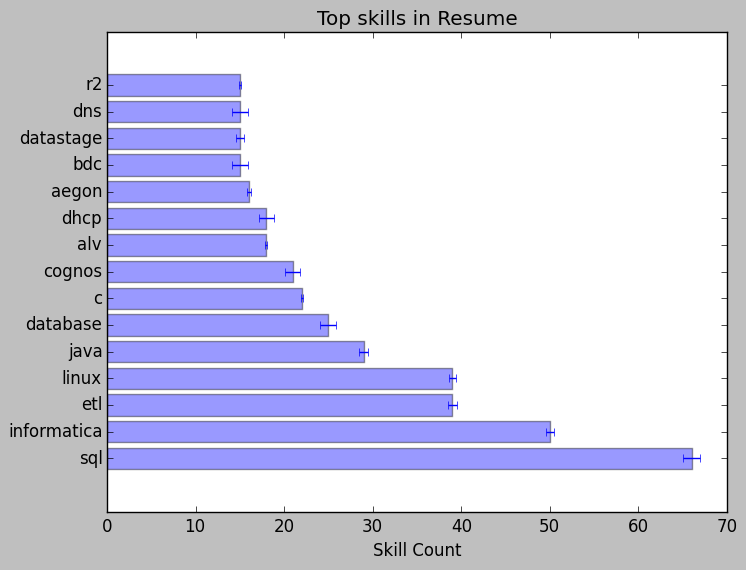

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

s= []; skill_count=[]
for point in TechWordFerq[:15]:
   s.append(point[0])
   skill_count.append(point[1])

# Example data
y_pos = np.arange(len(s))
error = np.random.rand(len(s))

plt.barh(y_pos, skill_count, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, s)
plt.xlabel('Skill Count')
plt.title('Top skills in Resume')
plt.show()

Words that most commonly occur with the identified skills

In [ ]:
words = [w.lower() for w in text.split()]
bcf = BigramCollocationFinder.from_words(words)
stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 2 or w in stopset
bcf.apply_word_filter(filter_stops)
collocation=bcf.nbest(BigramAssocMeasures.likelihood_ratio, 200) 

                   
def compare(s1, s2):
    remove = string.punctuation + string.whitespace
    return s1.translate(None, remove) == s2.translate(None, remove)


Skill_collocation=[]
for z in HighFreq:
    for tup in collocation:
        if compare(tup[0],z.lower()) or compare(tup[1],z.lower()) :
            Skill_collocation.append(tup)

In [8]:
print Skill_collocation

[('sql', 'server'), ('data', 'warehouse'), ('data', 'warehousing'), ('informatica', 'power'), ('etl', 'developer'), ('c,', 'c++,'), ('ibm', 'cognos'), ('alv', 'report'), ('aegon', 'netherlands'), ('datastage', '8.5'), ('cisco', 'routers'), ('css3,', 'javascript.'), ('windows', 'xp,'), ('windows', 'xp'), ('ffi', 'executive'), ('tata', 'consultancy'), ('c,', 'c++,'), ('html5,', 'css3,'), ('css3,', 'javascript.'), ('html5,', 'css3,'), ('jetking', 'kanpur.'), ('mando', 'automotive'), ('fsd,', 'enhancing'), ('abap', 'technical'), ('nfs,', 'nis,'), ('nfs,', 'nis,'), ('nop', 'commerce'), ('pega', 'prpc'), ('shell', 'scripting,'), ('\x07ffi', 'executive'), ('layouts.', 'ale/idocs'), ('id', '(crss):'), ('crss:', '\x07nishant'), ('cv', 'evaluation'), ('\x07nishita', 'joshi'), ('pega', 'prpc'), ('soup', 'ui,'), ('ui,', 'oracle')]
